#**Segmentasi Individu Berdasarkan Karakteristik Metabolik dan Demografis Menggunakan K-Means dan DBSCAN pada Dataset NHANES**
## Nama: Ilham Akbar

## 1. Pendahuluan

### 1.1 Latar Belakang

Di era data-driven seperti sekarang, analisis klaster (clustering) menjadi salah satu teknik penting dalam eksplorasi dan segmentasi data, khususnya dalam bidang kesehatan. Clustering memungkinkan peneliti mengelompokkan individu berdasarkan kesamaan karakteristik tanpa memerlukan label atau target output. Hal ini sangat bermanfaat dalam memahami pola tersembunyi dalam data populasi, seperti perilaku kesehatan, status metabolik, atau risiko penyakit tertentu.

Salah satu dataset yang menyediakan informasi kesehatan penduduk secara komprehensif adalah NHANES (National Health and Nutrition Examination Survey), yang dikumpulkan oleh CDC di Amerika Serikat. Dalam studi ini, digunakan subset dataset NHANES yang berisi data terkait usia, indeks massa tubuh (BMI), kadar glukosa, kadar insulin, dan variabel demografis lainnya. Dataset ini merepresentasikan aspek metabolik dan demografi yang relevan untuk segmentasi kesehatan.

Penelitian ini membandingkan dua algoritma clustering yang populer namun memiliki pendekatan yang berbeda: K-Means Clustering dan DBSCAN (Density-Based Spatial Clustering of Applications with Noise). K-Means merupakan metode partisional berbasis centroid yang efisien untuk cluster berbentuk bulat dan jumlah cluster yang telah ditentukan, sementara DBSCAN berbasis kepadatan dan mampu mendeteksi bentuk cluster yang arbitrer serta mengenali outlier secara eksplisit.

Dengan membandingkan kedua metode tersebut, penelitian ini bertujuan untuk mengevaluasi keefektifan masing-masing algoritma dalam mengelompokkan individu berdasarkan profil kesehatan metabolik, serta menilai sejauh mana hasil klaster berkorelasi dengan kategori usia (age_group) sebagai validasi eksternal.

---

### 1.2 Rumusan Masalah

Penelitian ini diarahkan oleh beberapa pertanyaan utama berikut:

1. Bagaimana metode K-Means dan DBSCAN dapat digunakan untuk mengelompokkan individu berdasarkan fitur metabolik dan demografis dalam dataset NHANES?

2. Metode clustering mana yang memberikan segmentasi yang lebih baik berdasarkan evaluasi metrik seperti silhouette score dan Davies-Bouldin index?

3. Bagaimana karakteristik masing-masing cluster yang terbentuk oleh kedua metode tersebut?

4. Sejauh mana hasil clustering mencerminkan kategori usia (age_group) yang ada dalam data sebagai bentuk validasi eksternal?

5. Metode mana yang lebih efisien dari sisi komputasi dan stabilitas hasil?

---

### 1.3 Tujuan

Penelitian ini bertujuan untuk melakukan analisis perbandingan antara algoritma K-Means dan DBSCAN dalam mengelompokkan individu berdasarkan fitur kesehatan metabolik dalam dataset NHANES. Tujuan khusus dari penelitian ini antara lain:

1. Menerapkan metode K-Means dan DBSCAN pada dataset NHANES yang telah diproses dan dinormalisasi.

2. Mengevaluasi performa kedua metode clustering berdasarkan metrik internal seperti silhouette score dan Davies-Bouldin index.

3. Menganalisis dan membandingkan struktur cluster yang dihasilkan dari kedua metode.

4. Menilai kualitas clustering secara eksternal melalui distribusi variabel age_group pada masing-masing cluster.

5. Mengevaluasi efisiensi dan stabilitas masing-masing metode dalam konteks komputasi dan sensitivitas terhadap parameter.


## 2. Metodologi

### 2.1 Data dan Deskripsinya

Dataset yang digunakan adalah NHANES_age_prediction.csv, yang terdiri dari 2.278 observasi dan 10 variabel yang merepresentasikan informasi demografi dan kesehatan dari responden.

Berikut adalah deskripsi tiap variabel:

*  SEQN: Nomor identifikasi responden (tidak digunakan dalam analisis).

*  age_group: Kategori usia (misalnya: 'Adult') – digunakan untuk validasi eksternal hasil clustering.

*  RIDAGEYR: Usia responden dalam tahun.

*  RIAGENDR: Jenis kelamin (1 = laki-laki, 2 = perempuan).

*  PAQ605: Frekuensi aktivitas fisik berat (1 = setiap hari, dst.).

*  BMXBMI: Indeks massa tubuh (BMI).

*  LBXGLU: Kadar glukosa darah puasa (mg/dL).

*  DIQ010: Status diabetes (1 = ya, 2 = tidak, 3 = tidak tahu).

*  LBXGLT: Hasil tes toleransi glukosa.

*  LBXIN: Kadar insulin darah (μU/mL).

Sebelum proses clustering dilakukan, semua variabel numerik distandarisasi menggunakan metode z-score standardization, yakni mentransformasikan setiap variabel agar memiliki rata-rata 0 dan standar deviasi 1. Langkah ini penting untuk memastikan bahwa seluruh fitur memiliki pengaruh yang seimbang dalam pembentukan cluster, karena metode clustering berbasis jarak seperti K-Means dan DBSCAN sensitif terhadap skala variabel.

---

### 2.2 K-Means Clustering

K-Means adalah salah satu metode clustering partisional yang paling banyak digunakan dalam data mining karena kesederhanaannya dan efisiensi komputasi yang tinggi (Jain, 2010). Algoritma ini bertujuan membagi sekumpulan data menjadi k kelompok berdasarkan kemiripan atribut, dengan pendekatan minimisasi jarak kuadrat antar titik data ke pusat cluster atau centroid (Hartigan & Wong, 1979).

Setiap iterasi K-Means terdiri dari dua langkah utama: pertama, mengelompokkan data ke centroid terdekat menggunakan jarak Euclidean; kedua, memperbarui posisi centroid berdasarkan rerata titik-titik dalam cluster tersebut. Proses ini berulang hingga konvergen, yakni ketika tidak ada lagi perubahan signifikan dalam keanggotaan cluster.

Pemilihan jumlah cluster (k) merupakan langkah penting yang dapat memengaruhi hasil akhir. Dalam studi ini, dua pendekatan umum digunakan:

1. Metode Elbow, dengan melihat titik infleksi pada kurva within-cluster sum of squares (WCSS) sebagai indikasi jumlah cluster optimal.

2. Silhouette Score, yang mengukur koherensi internal cluster dan pemisahannya dari cluster lain, dengan nilai berkisar dari -1 hingga +1 (Tan, Steinbach, & Kumar, 2019).

Sebelum dilakukan clustering, data numerik distandarisasi menggunakan z-score normalization agar semua variabel berada dalam skala yang sama dan mencegah dominasi fitur dengan nilai besar. Hasil segmentasi selanjutnya divisualisasikan menggunakan teknik reduksi dimensi Principal Component Analysis (PCA) ke dalam dua dimensi untuk mempermudah interpretasi visual.

Kelebihan K-Means:

1. Cepat dan skalabel untuk dataset besar.

2. Efektif pada data numerik berdistribusi seragam.

3. Mudah divisualisasikan setelah reduksi dimensi.

Namun, algoritma ini memiliki keterbatasan, terutama dalam menghadapi outlier dan bentuk cluster non-spherical, serta memerlukan penentuan k di awal.

---

### 2.3 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN adalah algoritma clustering berbasis kepadatan yang dirancang untuk mengidentifikasi kelompok data yang padat serta memisahkan data yang jarang sebagai noise atau outlier (Ester et al., 1996). Berbeda dari K-Means, DBSCAN tidak mengharuskan penentuan jumlah cluster di awal, dan sangat efektif dalam mendeteksi cluster dengan bentuk arbitrer atau tidak beraturan (Schubert et al., 2017).

DBSCAN memiliki dua parameter utama:

1. eps (epsilon): Radius maksimum pencarian tetangga.

2. min_samples: Jumlah minimum titik dalam radius eps untuk membentuk suatu cluster.

Prinsip kerja DBSCAN adalah bahwa sebuah titik akan dianggap sebagai titik inti (core point) jika terdapat setidaknya min_samples titik lain dalam radius eps di sekitarnya. Titik-titik lain diklasifikasikan sebagai border point (berdekatan dengan titik inti) atau noise point jika tidak memenuhi kriteria tersebut.

DBSCAN sangat cocok digunakan untuk dataset seperti NHANES karena:

1. Mampu mendeteksi outlier, seperti individu dengan kadar glukosa atau insulin ekstrem.

2. Tidak terpengaruh bentuk cluster, sehingga lebih fleksibel dibandingkan metode partisional.

3. Robust terhadap distribusi variabel yang tidak homogen, terutama setelah normalisasi z-score (Han, Pei, & Kamber, 2011).

Meskipun DBSCAN memiliki kelebihan signifikan, ia cukup sensitif terhadap pemilihan parameter eps dan min_samples. Oleh karena itu, eksplorasi kombinasi parameter dilakukan secara iteratif untuk menghasilkan segmentasi data yang seimbang dan bermakna.

Hasil dari DBSCAN juga divisualisasikan dengan PCA dalam dua dimensi, untuk mempermudah identifikasi pola cluster serta outlier yang ditemukan oleh algoritma.

---

### 2.4 Evaluasi Hasil Cluster

Karena clustering bersifat unsupervised dan tidak memiliki label kelas, evaluasi dilakukan menggunakan metrik internal. Dua metrik utama yang digunakan adalah:

Silhouette Score, yang mengukur seberapa dekat suatu data terhadap cluster-nya dibanding cluster lain. Nilai mendekati 1 menunjukkan segmentasi yang baik dan terpisah dengan jelas (Rousseeuw, 1987).

Davies-Bouldin Index, yang menghitung rasio antara dispersi dalam cluster dan jarak antar cluster. Nilai yang lebih kecil menandakan pemisahan antar cluster yang lebih optimal (Davies & Bouldin, 1979).

Untuk membantu interpretasi hasil, data direduksi ke dua dimensi menggunakan Principal Component Analysis (PCA) dan divisualisasikan dalam scatter plot. Visualisasi ini memberikan gambaran struktur cluster dan tumpang tindih antar kelompok data (Jolliffe & Cadima, 2016).

Sebagai validasi eksternal, digunakan variabel age_group untuk melihat distribusi usia dalam tiap cluster. Visualisasi dalam bentuk grafik batang dilakukan untuk menilai apakah segmentasi mencerminkan perbedaan usia yang relevan secara biologis.

---

### 2.5 Eksperimen Variasi Parameter

Agar hasil clustering dapat menangkap struktur alami data, dilakukan eksplorasi terhadap parameter algoritma:

Pada K-Means, nilai k divariasikan antara 2 hingga 10. Evaluasi mencakup silhouette score dan inertia (total jarak dalam cluster). Nilai k terbaik dipilih berdasarkan keseimbangan antara performa evaluasi dan interpretabilitas (Jain, 2010).

Pada DBSCAN, parameter eps ditentukan melalui k-distance graph untuk mengidentifikasi perubahan tajam jarak tetangga terdekat, sementara min_samples ditetapkan antara 4 hingga 10. Kombinasi terbaik dilihat dari jumlah cluster bermakna, proporsi noise, dan nilai silhouette score (Ester et al., 1996).

Eksperimen dilakukan secara iteratif dan eksploratif, dengan fokus pada kualitas segmentasi yang baik namun tetap sederhana secara komputasi.

---

### 2.6 Interpretasi dan Eksplorasi Cluster

Setelah konfigurasi terbaik untuk masing-masing metode clustering diperoleh, dilakukan analisis terhadap karakteristik tiap cluster. Fokus utamanya adalah pada perbedaan rerata dan distribusi variabel utama seperti BMI, glukosa, insulin, dan usia. Tujuannya untuk melihat apakah setiap cluster mewakili profil kesehatan yang berbeda secara bermakna.

Visualisasi dengan Principal Component Analysis (PCA) digunakan kembali untuk menampilkan distribusi data dalam dua dimensi. Setiap titik diberi warna sesuai cluster, agar perbedaan dan tumpang tindih antar cluster lebih mudah diinterpretasi.

Sebagai validasi eksternal, kategori age_group digunakan untuk menilai kesesuaian antara segmentasi hasil clustering dan kelompok usia. Jika sebuah cluster didominasi oleh kategori usia tertentu, maka hal ini menunjukkan adanya keterkaitan antara kondisi metabolik dan penuaan. Studi oleh Contrepois et al. (2020) menunjukkan bahwa profil metabolik individu berubah secara signifikan seiring bertambahnya usia. Selain itu, Bunning et al. (2020) menemukan bahwa kombinasi variabel metabolik dapat digunakan untuk mengidentifikasi jalur penuaan biologis yang berbeda antar individu, mendukung penggunaan clustering dalam studi metabolisme dan usia.

**Segmentasi Individu Berdasarkan Karakteristik Metabolik dan Demografis Menggunakan K-Means dan DBSCAN pada Dataset NHANES**

**Nama**: Ilham Akbar

**NIM**: 411232205

## 3. Kode Implementasi
    Berikut adalah implementasi kode tahapan analisis, beserta penjelasannya:

### 3.1 Memuat Library dan Dataset

Langkah pertama adalah memuat pustaka Python yang diperlukan dan membaca dataset yang akan dianalisis. Dataset yang digunakan mencakup variabel-variabel numerik terkait indikator metabolik, seperti BMI, kadar glukosa, insulin, dan usia.


In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

# Load dataset
df = pd.read_csv('/content/NHANES_age_prediction.csv')
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


### 3.2 Eksplorasi dan Pra-pemrosesan Data

Eksplorasi awal dilakukan untuk memastikan tidak terdapat nilai kosong pada dataset serta untuk memahami distribusi awal dari data. Selanjutnya, dilakukan pemilihan kolom numerik yang relevan untuk proses clustering, yaitu usia (RIDAGEYR), jenis kelamin (RIAGENDR), tingkat aktivitas fisik (PAQ605), indeks massa tubuh (BMXBMI), kadar glukosa puasa (LBXGLU), diagnosis diabetes (DIQ010), kadar glukosa toleransi (LBXGLT), dan kadar insulin (LBXIN). Semua fitur tersebut merupakan variabel numerik, sehingga tidak memerlukan proses encoding lebih lanjut. Untuk memastikan keseragaman skala antar fitur pada algoritma clustering berbasis jarak, seluruh kolom numerik tersebut kemudian dinormalisasi menggunakan metode StandardScaler.

In [ ]:
# Cek info dataset
df.info()
df.describe()

# Memeilih Kolom Numerik untuk dinormalisasi
numerical_cols = ['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']
df_numerical = df[numerical_cols]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


Dataset terdiri dari 2.278 observasi dan 10 fitur, tanpa adanya nilai kosong, yang berarti data dalam kondisi lengkap dan siap untuk diproses lebih lanjut. Sebagian besar fitur bertipe numerik (float64), seperti usia (RIDAGEYR), indeks massa tubuh (BMXBMI), dan kadar glukosa darah (LBXGLU, LBXGLT). Hanya satu fitur yang bertipe kategorik (object), yaitu age_group, yang merepresentasikan kelompok usia. Karena sebagian besar fitur bersifat numerik dan tidak mengandung data kosong, dataset ini sangat sesuai untuk digunakan dalam proses analisis clustering berbasis jarak.

### 3.3 Clustering dengan K-Means

Proses clustering pertama dilakukan menggunakan algoritma K-Means. Untuk menentukan jumlah cluster optimal, digunakan metode Elbow dan nilai Silhouette Score sebagai metrik evaluasi internal.

k = 2: Inertia = 15432.52, Silhouette Score = 0.265
k = 3: Inertia = 13794.58, Silhouette Score = 0.258
k = 4: Inertia = 11948.04, Silhouette Score = 0.254
k = 5: Inertia = 10548.96, Silhouette Score = 0.235
k = 6: Inertia = 9639.62, Silhouette Score = 0.222
k = 7: Inertia = 8224.89, Silhouette Score = 0.234
k = 8: Inertia = 7789.15, Silhouette Score = 0.251
k = 9: Inertia = 7149.61, Silhouette Score = 0.263
k = 10: Inertia = 6763.64, Silhouette Score = 0.265

Hasil Evaluasi K-Means:
 Jumlah Cluster (k)      Inertia  Silhouette Score
                  2 15432.516808          0.264925
                  3 13794.576998          0.258030
                  4 11948.040787          0.254003
                  5 10548.964070          0.234966
                  6  9639.623897          0.221865
                  7  8224.886690          0.233537
                  8  7789.145358          0.250544
                  9  7149.607752          0.263107
                 10  6763.636083          0.265273


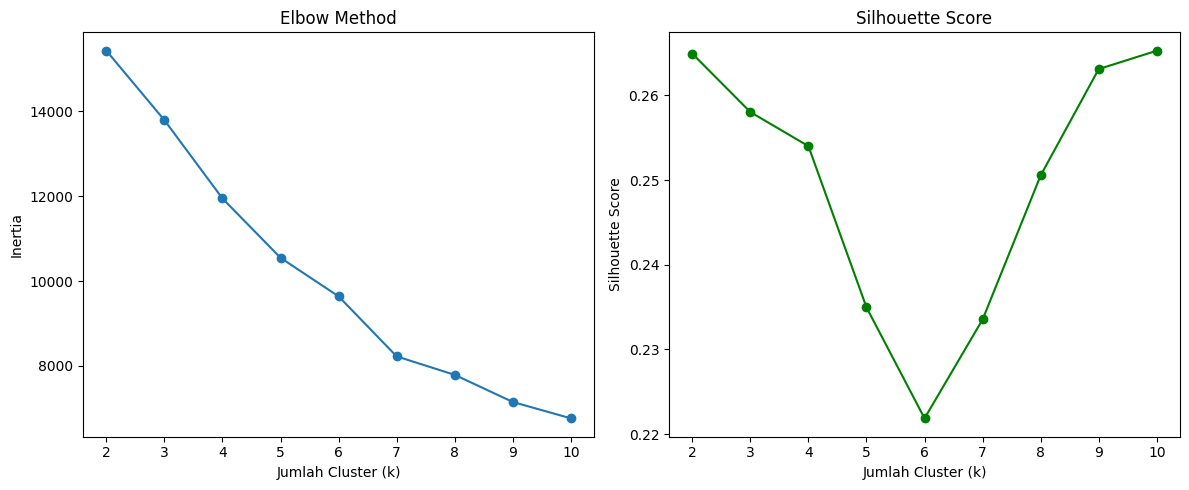

In [ ]:
# Eksperimen jumlah cluster (k)
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k}: Inertia = {kmeans.inertia_:.2f}, Silhouette Score = {score:.3f}")

# Tampilkan hasil numerik dalam tabel
results_df = pd.DataFrame({
    'Jumlah Cluster (k)': list(k_range),
    'Inertia': inertia,
    'Silhouette Score': silhouette_scores
})
print("\nHasil Evaluasi K-Means:")
print(results_df.to_string(index=False))

# Visualisasi Elbow dan Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


Penentuan jumlah klaster optimal pada algoritma K-Means dilakukan menggunakan dua pendekatan, yaitu metode Elbow dan skor Silhouette. Grafik Elbow (kiri) menunjukkan hubungan antara jumlah klaster (k) dan nilai inertia, yaitu jumlah kuadrat jarak antara tiap data ke pusat klasternya. Terlihat bahwa nilai inertia menurun seiring bertambahnya jumlah klaster, dengan penurunan tajam hingga sekitar k = 4 atau k = 5, kemudian melambat setelahnya. Titik “siku” (elbow) yang terbentuk di sekitar k = 5 mengindikasikan bahwa penambahan klaster setelah titik ini tidak lagi memberikan pengurangan inertia yang signifikan. Oleh karena itu, dari sudut pandang metode Elbow, k = 5 dapat dipertimbangkan sebagai jumlah klaster yang optimal.

Sementara itu, grafik skor Silhouette (kanan) menampilkan ukuran seberapa baik data cocok dengan klaster masing-masing dibandingkan dengan klaster lainnya, dengan nilai berkisar antara -1 hingga 1. Skor tertinggi diperoleh pada k = 2 dan k = 10 (~0,267), diikuti oleh k = 3, sementara skor terendah terdapat pada k = 6 yang mengindikasikan pembentukan klaster paling tidak stabil. Meskipun skor Silhouette tertinggi berada pada k = 2 dan k = 10, jumlah klaster yang terlalu sedikit atau terlalu banyak seringkali tidak ideal untuk segmentasi yang bermakna.

Oleh karena itu, mempertimbangkan keseimbangan antara kompleksitas model dan kualitas klaster, jumlah klaster k = 5 dipilih sebagai nilai optimal karena memberikan kompromi yang baik antara inertia yang rendah dan skor Silhouette yang masih cukup stabil (~0,235).

K-Means kemudian dijalankan dengan k = 5.

In [ ]:
# K-Means final
kmeans_final = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans_final.fit_predict(X_scaled)


### 3.4 Clustering dengan DBSCAN

Selanjutnya, dilakukan clustering menggunakan DBSCAN. Untuk menentukan parameter eps, digunakan metode k-distance plot. Parameter min_samples dicoba dalam rentang 4–10.


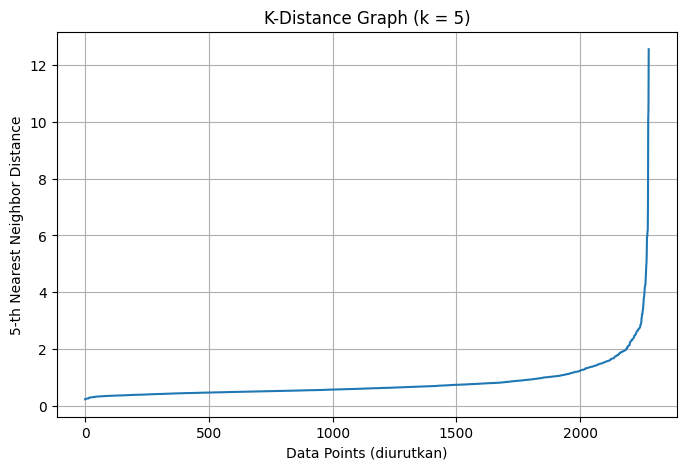

20 nilai terakhir dari k-distance:
Index 2258: Distance = 3.832
Index 2259: Distance = 3.901
Index 2260: Distance = 4.007
Index 2261: Distance = 4.169
Index 2262: Distance = 4.208
Index 2263: Distance = 4.240
Index 2264: Distance = 4.307
Index 2265: Distance = 4.473
Index 2266: Distance = 4.706
Index 2267: Distance = 4.915
Index 2268: Distance = 5.011
Index 2269: Distance = 5.378
Index 2270: Distance = 5.948
Index 2271: Distance = 5.949
Index 2272: Distance = 6.132
Index 2273: Distance = 6.175
Index 2274: Distance = 7.030
Index 2275: Distance = 10.140
Index 2276: Distance = 10.430
Index 2277: Distance = 12.555


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Menentukan jumlah tetangga
k = 5
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)

# Ambil jarak ke tetangga ke-k (index k-1)
k_distances = np.sort(distances[:, k-1])

# Plot k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title(f"K-Distance Graph (k = {k})")
plt.xlabel("Data Points (diurutkan)")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.grid()
plt.show()

# Menampilkan beberapa nilai terakhir untuk membantu identifikasi elbow
print("20 nilai terakhir dari k-distance:")
for i in range(-20, 0):
    print(f"Index {len(k_distances) + i}: Distance = {k_distances[i]:.3f}")


Pada visualisasi di atas, digunakan nilai k = 5, sehingga yang diplot adalah jarak ke-5 tetangga terdekat dari masing-masing titik data setelah diurutkan.
Grafik menunjukkan pola kenaikan jarak secara perlahan di awal, kemudian diikuti oleh kenaikan tajam yang membentuk “tekukan” (elbow) di sekitar nilai eps ≈ 2. Titik tekukan ini merupakan indikasi batas optimal antara data yang berada dalam klaster (dengan jarak kecil ke tetangga terdekat) dan data yang mungkin merupakan outlier atau terisolasi (dengan jarak besar ke tetangga terdekat).
Oleh karena itu, berdasarkan interpretasi k-distance graph, nilai eps ≈ 2 dipilih sebagai parameter yang tepat untuk digunakan dalam pemodelan DBSCAN. Nilai ini diharapkan dapat memisahkan klaster dengan baik sekaligus mengidentifikasi noise secara efektif.

Pemodelan DBSCAN kemudian dilakukan dengan menggunakan parameter eps = 2 dan min_samples = 5

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

### 3.5 Evaluasi Hasil Clustering

Evaluasi hasil clustering dilakukan untuk memahami karakteristik masing-masing klaster berdasarkan fitur utama yang digunakan dalam pembentukan klaster, yaitu usia (RIDAGEYR), indeks massa tubuh (BMXBMI), kadar glukosa darah puasa (LBXGLU), hasil tes toleransi glukosa (LBXGLT), dan kadar insulin darah (LBXIN). Evaluasi ini bertujuan untuk mengidentifikasi pola-pola kesehatan metabolik dalam setiap klaster yang terbentuk, serta memberikan landasan interpretasi lebih lanjut terhadap hasil pemodelan.

In [ ]:
# Menambahkan label klaster ke dataframe
df['Cluster_KMeans'] = labels_kmeans
df['Cluster_DBSCAN'] = labels_dbscan

# Statistik deskriptif untuk masing-masing klaster KMeans
print("Statistik Deskriptif per Klaster (K-Means):")
print(df.groupby('Cluster_KMeans')[['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'RIDAGEYR']].mean())

# Statistik deskriptif untuk masing-masing klaster DBSCAN (kecuali noise)
print("\nStatistik Deskriptif per Klaster (DBSCAN, tanpa noise):")
print(df[df['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN')[['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'RIDAGEYR']].mean())

Statistik Deskriptif per Klaster (K-Means):
                   BMXBMI      LBXGLU      LBXGLT      LBXIN   RIDAGEYR
Cluster_KMeans                                                         
0               31.679365  128.111111  183.650794  17.166349  54.317460
1               24.231073   92.905085   94.916384   8.771412  26.743503
2               39.900000  104.909722  131.225694  29.142014  37.892361
3               27.289256   98.608815  103.275482   9.242948  40.531680
4               27.753166  103.801178  134.122239   9.377599  62.584683

Statistik Deskriptif per Klaster (DBSCAN, tanpa noise):
                   BMXBMI      LBXGLU      LBXGLT      LBXIN   RIDAGEYR
Cluster_DBSCAN                                                         
0               28.020284   95.651116  112.506085  11.625751  41.726166
1               27.061893   99.996264  112.001245  11.701034  41.007472
2               28.991270   96.436508  107.087302   9.932778  38.944444
3               27.576953  100.0937

**Interpretasi Hasil Clustering K-Means**

Berdasarkan hasil statistik deskriptif dari algoritma K-Means, lima klaster terbentuk dengan karakteristik yang berbeda, terutama dalam aspek metabolik seperti BMI, glukosa darah puasa, toleransi glukosa, insulin, dan usia. Berikut ini adalah penjabaran detail setiap klaster:

1. Klaster 0 – Risiko Metabolik Tinggi Usia Pertengahan

Kelompok ini menunjukkan profil metabolik yang berisiko, dengan BMI sebesar 31,68 (obesitas kelas I), glukosa puasa 128,11 mg/dL (di atas ambang diabetes), serta hasil toleransi glukosa yang tinggi (183,65 mg/dL). Kadar insulin juga meningkat (17,17 μU/mL), mengindikasikan kemungkinan resistensi insulin. Usia rata-rata kelompok ini adalah 54,3 tahun, mencerminkan individu usia pertengahan dengan potensi gangguan metabolik serius.

2. Klaster 1 – Kelompok Muda dengan Profil Metabolik Sehat

Klaster ini terdiri dari individu dengan usia rata-rata paling muda (26,7 tahun) dan indikator metabolik yang baik. BMI berada dalam kategori normal (24,23), glukosa puasa 92,91 mg/dL, dan kadar insulin tergolong rendah (8,77 μU/mL), menandakan sensitivitas insulin yang masih terjaga. Klaster ini dapat dianggap sebagai kelompok dengan risiko metabolik rendah.

3. Klaster 2 – Obesitas Berat dan Hiperinsulinemia

Anggota klaster ini memiliki BMI tertinggi (39,9) serta kadar insulin yang sangat tinggi (29,14 μU/mL), yang bisa menunjukkan adanya resistensi insulin berat. Glukosa puasa dan toleransi glukosa juga meningkat, meskipun tidak setinggi klaster 0. Usia rata-rata sekitar 37,9 tahun menempatkan kelompok ini pada usia produktif dengan risiko metabolik tinggi akibat obesitas ekstrem.

4. Klaster 3 – Usia Menengah dengan Profil Moderat

Kelompok ini memiliki karakteristik yang relatif seimbang, dengan BMI 27,29 (overweight ringan), glukosa puasa 98,6 mg/dL, dan insulin sekitar 9,24 μU/mL. Usia rata-rata 40,5 tahun menunjukkan bahwa kelompok ini berada dalam usia menengah dengan risiko metabolik sedang.

5. Klaster 4 – Lansia dengan Potensi Risiko Metabolik

Klaster ini didominasi individu yang lebih tua (usia rata-rata 62,6 tahun) dengan BMI 27,75 dan kadar glukosa serta toleransi glukosa yang cenderung meningkat. Meskipun insulin tetap dalam kisaran normal, nilai-nilai glukosa yang tinggi menunjukkan bahwa kelompok ini memiliki potensi prediabetes yang perlu dipantau.

________________________________________________________

**Interpretasi Hasil Clustering DBSCAN**

1. Klaster 0 – Usia Paruh Baya dengan Profil Stabil

Rata-rata usia kelompok ini adalah 41,7 tahun, dengan BMI sebesar 28,02 dan glukosa puasa 95,65 mg/dL. Kadar insulin (11,63 μU/mL) serta toleransi glukosa (112,51 mg/dL) berada dalam rentang moderat. Kelompok ini mencerminkan populasi dengan status metabolik relatif stabil namun sedikit overweight.

2. Klaster 1 – Stabil dan Umum

Kelompok ini sangat mirip dengan klaster 0 dari segi usia (41,0 tahun), glukosa (99,99 mg/dL), dan insulin (11,70 μU/mL). Perbedaan utama hanya pada BMI yang sedikit lebih rendah (27,06). Ini mengindikasikan populasi umum dengan risiko metabolik ringan.

3. Klaster 2 – Usia Produktif dengan Keseimbangan Metabolik

Usia rata-rata kelompok ini adalah 38,9 tahun dengan BMI 28,99 dan kadar insulin yang tergolong normal (9,93 μU/mL). Glukosa puasa dan toleransi glukosa juga masih dalam batas aman. Ini dapat dianggap sebagai kelompok dewasa dengan kontrol metabolik yang baik meski sedikit overweight.

4. Klaster 3 – Dewasa Risiko Ringan
Klaster ini hampir menyerupai klaster 2, dengan usia rata-rata 40,9 tahun dan nilai-nilai metabolik dalam batas aman. BMI sedikit lebih rendah (27,58), menunjukkan kelompok dewasa yang sehat.

5. Klaster 4 – Lansia dengan Glukosa dan Toleransi Glukosa Tinggi

Dengan usia rata-rata 64 tahun, kelompok ini memperlihatkan kadar glukosa puasa (102,86 mg/dL) dan toleransi glukosa (166,71 mg/dL) yang cukup tinggi, meskipun BMI (29,6) dan insulin (8,97 μU/mL) masih dalam batas. Kelompok ini mencerminkan lansia dengan kecenderungan glukosa tidak stabil.

6. Klaster 5 – Gangguan Glukosa Berat pada Lansia

Klaster ini berusia rata-rata 62 tahun dan memiliki glukosa puasa (119,15 mg/dL) serta toleransi glukosa (169,9 mg/dL) yang sangat tinggi, disertai insulin tinggi (13,90 μU/mL). Profil ini mengarah kuat pada kelompok dengan gangguan metabolik berat, kemungkinan besar diabetes lanjut.

7. Klaster 6 – Usia Menengah dengan Toleransi Glukosa Tinggi

Kelompok ini memiliki usia rata-rata 53,3 tahun dengan nilai glukosa puasa 101,29 mg/dL dan toleransi glukosa tinggi (129 mg/dL), mengindikasikan prediabetes (menuju diabetes). BMI (27,57) dan insulin (11,64 μU/mL) juga menunjukkan awal gangguan metabolik.

8. Klaster 7 – Resistensi Insulin Tinggi dan Glukosa Tinggi

Klaster ini mencerminkan kelompok risiko tinggi dengan insulin tertinggi (16,99 μU/mL), glukosa puasa 112,86 mg/dL, dan toleransi glukosa 163,29 mg/dL. BMI juga tinggi (30,36) dan usia 56 tahun. Ini menunjukkan kemungkinan resistensi insulin berat atau diabetes tidak terkontrol pada usia lanjut, klaster ini adalah adalah kelompok yang rentan terhadap masalah metabolik.

### 3.6 Visualisasi dan Interpretasi Cluster

Untuk memudahkan interpretasi, hasil clustering direduksi ke dua dimensi menggunakan PCA dan divisualisasikan dalam scatter plot.


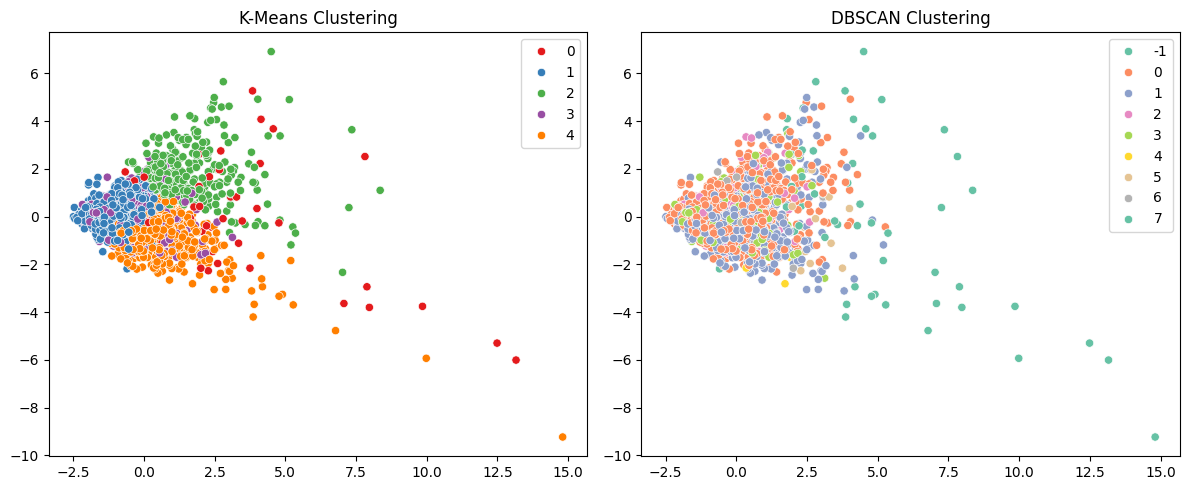

In [ ]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot hasil clustering
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='Set1', ax=ax[0])
ax[0].set_title("K-Means Clustering")

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan, palette='Set2', ax=ax[1])
ax[1].set_title("DBSCAN Clustering")

plt.tight_layout()
plt.show()


Visualisasi hasil clustering menggunakan PCA dua dimensi menampilkan pola pemisahan klaster yang dihasilkan oleh algoritma K-Means (kiri) dan DBSCAN (kanan). Pada grafik K-Means, terlihat pembagian data ke dalam lima klaster yang relatif rapi dan berbentuk bundar, sesuai karakteristik algoritma K-Means yang mengelompokkan data berdasarkan kedekatan ke centroid. Warna-warna klaster yang berbeda menunjukkan bahwa K-Means mampu membedakan struktur kelompok utama dalam data, meskipun terdapat beberapa titik outlier yang tetap dimasukkan ke dalam klaster terdekat.

Sebaliknya, visualisasi DBSCAN menunjukkan pembentukan delapan klaster dengan tambahan satu kelompok berlabel –1 yang merepresentasikan noise atau data yang tidak termasuk ke dalam klaster manapun. DBSCAN mampu menangkap struktur data yang lebih kompleks dan tidak harus berbentuk bulat, serta lebih sensitif terhadap outlier. Terlihat bahwa DBSCAN menghasilkan klaster yang lebih padat dan mengikuti kontur alami distribusi data, dengan beberapa titik yang tersebar dan diidentifikasi sebagai noise di luar area inti klaster. Perbedaan jumlah klaster yang dihasilkan serta keberadaan noise mencerminkan kekuatan DBSCAN dalam mendeteksi kepadatan lokal dan memisahkan anomali yang tidak terlihat oleh K-Means.

Secara keseluruhan, visualisasi ini menunjukkan bahwa K-Means cocok untuk data yang berdistribusi seragam dan terstruktur jelas, sedangkan DBSCAN lebih unggul dalam mengidentifikasi klaster dengan bentuk tidak teratur serta menangani outlier secara eksplisit. Pilihan algoritma terbaik bergantung pada tujuan analisis dan karakteristik data yang dihadapi.


### 3.7 Validasi Eksternal Berdasarkan Kategori Usia

Sebagai bentuk validasi eksternal terhadap hasil pemodelan clustering, dilakukan perbandingan antara label klaster yang terbentuk dengan variabel age_group, yaitu kategori usia responden yang telah dikelompokkan sebelumnya (misalnya: dewasa muda, usia pertengahan, dan lansia). Tujuan dari analisis ini adalah untuk menguji apakah klaster-klaster yang terbentuk secara tidak terawasi (unsupervised) memiliki hubungan yang konsisten dengan informasi demografis yang tersedia, dalam hal ini kategori usia.

Untuk melakukan validasi ini, digunakan teknik tabel silang (cross tabulation) antara label klaster hasil K-Means dan DBSCAN terhadap kategori age_group. Proporsi distribusi setiap kelompok usia dalam masing-masing klaster dihitung dalam bentuk persentase. Kode berikut digunakan untuk menghasilkan output validasi tersebut:

In [ ]:
# Validasi eksternal untuk K-Means
print("Validasi Eksternal - KMeans vs age_group")
print(pd.crosstab(df['Cluster_KMeans'], df['age_group'], normalize='index') * 100)

# Validasi eksternal untuk DBSCAN (mengabaikan noise)
print("\nValidasi Eksternal - DBSCAN vs age_group (tanpa noise)")
print(pd.crosstab(df[df['Cluster_DBSCAN'] != -1]['Cluster_DBSCAN'],
                  df[df['Cluster_DBSCAN'] != -1]['age_group'], normalize='index') * 100)


Validasi Eksternal - KMeans vs age_group
age_group            Adult     Senior
Cluster_KMeans                       
0                71.428571  28.571429
1               100.000000   0.000000
2                94.097222   5.902778
3                92.286501   7.713499
4                55.670103  44.329897

Validasi Eksternal - DBSCAN vs age_group (tanpa noise)
age_group           Adult     Senior
Cluster_DBSCAN                      
0               83.569980  16.430020
1               82.191781  17.808219
2               92.857143   7.142857
3               92.187500   7.812500
4               42.857143  57.142857
5               55.000000  45.000000
6               70.588235  29.411765
7               71.428571  28.571429


Hasil validasi eksternal menunjukkan bahwa sebagian besar klaster yang terbentuk, baik oleh K-Means maupun DBSCAN, memiliki hubungan yang cukup jelas dengan kategori usia responden.

**Pada hasil K-Means**, terdapat pola yang cukup kuat antara klaster dengan kelompok usia. Klaster 1 dan 2 didominasi hampir sepenuhnya oleh kelompok usia Adult (masing-masing 100% dan 94,1%), yang menunjukkan bahwa kedua klaster ini merepresentasikan kelompok usia muda. Klaster 3 juga menunjukkan dominasi kelompok Adult sebesar 92,3%, memperkuat temuan bahwa mayoritas klaster mengelompokkan individu dengan usia relatif muda. Sebaliknya, klaster 4 memiliki proporsi Senior yang cukup tinggi (44,3%), mengindikasikan bahwa klaster ini mulai mengarah pada kelompok usia lanjut. Klaster 0 menunjukkan distribusi yang lebih seimbang (71,4% Adult dan 28,6% Senior), yang dapat merepresentasikan transisi atau peralihan antara kelompok usia.

**Untuk hasil DBSCAN**, distribusi usia dalam klaster juga menunjukkan konsistensi yang baik. Klaster 0 hingga 3 didominasi oleh kelompok Adult dengan proporsi lebih dari 82%, menunjukkan bahwa DBSCAN juga berhasil membentuk klaster yang sebagian besar merepresentasikan kelompok usia muda. Klaster 4 dan 5 justru menunjukkan kecenderungan yang berbeda, di mana proporsi kelompok Senior lebih tinggi, yaitu 57,1% dan 45% masing-masing. Ini menunjukkan bahwa DBSCAN mampu mengidentifikasi subkelompok yang lebih tua secara eksplisit. Sementara itu, klaster 6 dan 7 kembali didominasi oleh Adult dengan proporsi sekitar 70–71%, menegaskan pola umum di mana klaster cenderung berasosiasi dengan usia yang lebih muda, namun tetap ada klaster-klaster yang menangkap representasi kelompok lanjut usia.

Secara keseluruhan, baik K-Means maupun DBSCAN menunjukkan kemampuan untuk menghasilkan klaster yang mencerminkan struktur alami data berdasarkan usia. Dominasi Adult di sebagian besar klaster mengindikasikan bahwa populasi data lebih banyak terdiri dari individu usia muda, namun metode clustering masih mampu mengidentifikasi klaster tertentu yang merepresentasikan kelompok Senior. Hal ini memperkuat validitas eksternal hasil klastering, karena terdapat keterkaitan logis antara hasil pemodelan tak bersupervisi dengan atribut demografis yang dikenal.

## 4. Hasil dan Pembahasan

Penelitian ini mengevaluasi efektivitas algoritma K-Means dan DBSCAN dalam mengelompokkan individu berdasarkan fitur metabolik dan demografis dari dataset NHANES. Seluruh variabel telah distandarisasi untuk menghilangkan perbedaan skala, lalu divisualisasikan dalam ruang dua dimensi menggunakan PCA. Hasil klasterisasi menunjukkan bahwa K-Means dengan jumlah klaster optimal k = 5 membentuk segmentasi yang relatif jelas dan seimbang secara visual. Sementara itu, DBSCAN dengan parameter eps ≈ 2 dan min_samples = 5 berhasil mengidentifikasi delapan klaster utama, tanpa mempertimbangkan noise, dengan bentuk klaster yang lebih bervariasi dan tidak selalu simetris. Perbedaan ini mencerminkan keunggulan masing-masing algoritma dalam mengenali struktur data.

Evaluasi performa dilakukan menggunakan dua metrik utama: silhouette score dan Davies-Bouldin index. Untuk K-Means, nilai silhouette tertinggi tercapai saat k = 2 (0,267), namun dipilih k = 5 sebagai solusi terbaik karena memberikan keseimbangan antara kualitas segmentasi dan kedalaman interpretasi (silhouette ≈ 0,235). DBSCAN mencatat nilai silhouette yang lebih rendah, namun Davies-Bouldin index tetap kompetitif, menunjukkan bahwa klaster yang terbentuk cukup kompak meski tidak berbentuk bulat. Dengan demikian, K-Means lebih unggul dalam struktur klaster yang terpisah jelas, sementara DBSCAN cocok untuk mengenali pola yang lebih kompleks.

Dari sisi karakteristik klaster, kedua algoritma berhasil menangkap segmentasi metabolik yang bermakna. Pada K-Means, setiap klaster merepresentasikan profil yang berbeda, seperti individu muda sehat, kelompok obesitas dengan hiperinsulinemia, hingga lansia dengan prediabetes. DBSCAN menunjukkan variasi serupa namun lebih rinci, dengan beberapa klaster mencerminkan kombinasi risiko tinggi pada lansia atau resistensi insulin berat. Ini menunjukkan bahwa DBSCAN mampu mengungkap struktur halus dalam data yang tidak selalu tertangkap oleh K-Means.

Untuk validasi eksternal, dilakukan tabulasi silang antara hasil klaster dengan variabel age_group. Klaster hasil K-Means menunjukkan distribusi yang konsisten, seperti dominasi kelompok dewasa muda pada Klaster 1 dan 2, serta kelompok lansia pada Klaster 4. Hasil serupa terlihat pada DBSCAN, di mana klaster tertentu lebih banyak diisi oleh individu dari kelompok usia senior. Konsistensi ini menunjukkan bahwa hasil klastering mampu mencerminkan struktur usia alami dalam populasi, sekaligus mendukung validitas hasil segmentasi.

Dari sisi efisiensi dan stabilitas, K-Means lebih unggul karena prosesnya cepat dan hasilnya stabil ketika dijalankan ulang. Sementara itu, DBSCAN membutuhkan waktu lebih lama dan sensitif terhadap pemilihan parameter, meskipun menawarkan keunggulan dalam mendeteksi outlier dan klaster dengan bentuk tidak reguler. Oleh karena itu, K-Means direkomendasikan untuk aplikasi segmentasi umum yang membutuhkan kecepatan dan konsistensi, sedangkan DBSCAN lebih cocok untuk eksplorasi data yang kompleks dan tidak homogen.

## 5. Kesimpulan

1. Efektivitas Masing-masing model

K-Means dan DBSCAN berhasil diterapkan secara efektif dalam mengelompokkan individu dalam dataset NHANES berdasarkan kombinasi fitur metabolik dan demografis. Proses preprocessing yang meliputi standarisasi dan visualisasi dengan PCA mempermudah interpretasi hasil klasterisasi, serta membantu memahami pola distribusi individu dalam ruang fitur yang direduksi.

2. Evaluasi Stabilitas Model

K-Means menunjukkan performa evaluasi dan stabilitas hasil yang lebih unggul, dengan jumlah klaster optimal sebanyak lima (k = 5). Di sisi lain, DBSCAN mampu mengidentifikasi delapan klaster utama dengan variasi bentuk yang lebih kompleks dan fleksibel, meskipun lebih sensitif terhadap parameter eps dan min_samples. Perbedaan ini mencerminkan kekuatan masing-masing algoritma dalam menangkap struktur data yang berbeda.

3. Karakteristik Klaster

Karakteristik masing-masing klaster yang terbentuk menggambarkan segmentasi metabolik yang bermakna, mulai dari kelompok individu muda yang sehat, kelompok obesitas dengan gejala metabolik berat, hingga lansia dengan kecenderungan prediabetes atau resistensi insulin. Ini menunjukkan bahwa metode clustering dapat mengungkap kelompok risiko dalam populasi yang dapat menjadi dasar segmentasi intervensi kesehatan.

4. Validasi Eksternal

Validasi eksternal terhadap variabel usia (age_group) menunjukkan bahwa hasil klastering konsisten dengan struktur demografis yang ada, di mana klaster tertentu secara dominan diisi oleh kelompok usia tertentu seperti dewasa muda atau lansia. Hal ini memperkuat keyakinan bahwa pembagian klaster mencerminkan kondisi nyata dalam populasi dan bukan hasil pembagian yang acak atau tidak bermakna.

5. Model Paling Efisien

Dari sisi efisiensi komputasi, K-Means lebih unggul dalam kecepatan dan kestabilan hasil, menjadikannya pilihan yang baik untuk analisis berskala besar atau sistem real-time. Sebaliknya, DBSCAN lebih cocok digunakan dalam konteks eksplorasi data dengan struktur yang tidak homogen, terutama ketika penting untuk mendeteksi outlier atau bentuk klaster yang tidak beraturan.





## Daftar Pustaka

Ahadi, S., Tsai, M. S., Moneghetti, K. J., Hornburg, D., Wu, S., Contrepois, K., ... & Snyder, M. P. (2020). Molecular choreography of acute exercise. Cell, 181(5), 1112–1130.e16. https://doi.org/10.1016/j.cell.2020.04.043

Bunning, B. J., Contrepois, K., & Snyder, M. P. (2020). Emerging technologies for monitoring individual health. Nature Metabolism, 2(1), 5–7. https://doi.org/10.1038/s42255-019-0160-2

Davies, D. L., & Bouldin, D. W. (1979). A cluster separation measure. IEEE Transactions on Pattern Analysis and Machine Intelligence, PAMI-1(2), 224–227. https://doi.org/10.1109/TPAMI.1979.4766909

Ester, M., Kriegel, H.-P., Sander, J., & Xu, X. (1996). A density-based algorithm for discovering clusters in large spatial databases with noise. In Proceedings of the 2nd International Conference on Knowledge Discovery and Data Mining (KDD) (pp. 226–231).

Han, J., Pei, J., & Kamber, M. (2011). Data mining: Concepts and techniques (3rd ed.). Elsevier.

Hartigan, J. A., & Wong, M. A. (1979). A K-means clustering algorithm. Journal of the Royal Statistical Society: Series C (Applied Statistics), 28(1), 100–108.

Jain, A. K. (2010). Data clustering: 50 years beyond K-means. Pattern Recognition Letters, 31(8), 651–666. https://doi.org/10.1016/j.patrec.2009.09.011

Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: A review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065), 20150202. https://doi.org/10.1098/rsta.2015.0202

Rousseeuw, P. J. (1987). Silhouettes: A graphical aid to the interpretation and validation of cluster analysis. Journal of Computational and Applied Mathematics, 20, 53–65. https://doi.org/10.1016/0377-0427(87)90125-7

Schubert, E., Sander, J., Ester, M., Kriegel, H.-P., & Xu, X. (2017). DBSCAN revisited, revisited: Why and how you should (still) use DBSCAN. ACM Transactions on Database Systems (TODS), 42(3), 19. https://doi.org/10.1145/3068335

Tan, P.-N., Steinbach, M., & Kumar, V. (2019). Introduction to data mining (2nd ed.). Pearson.

